In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import numpy as np

In [3]:
titanic = pd.read_csv("../metrics/titanic/cleaned.csv")
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [4]:
target = titanic.Survived
data = titanic.drop(columns="Survived")

In [14]:
trees = [1] + list(range(10,100,5))

In [15]:
trees

[1, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

In [16]:
%%time

ada_scoring = []
for tree in trees:
    ada = AdaBoostClassifier(n_estimators=tree)
    score = cross_val_score(ada, data, target, scoring="roc_auc", cv=3)
    ada_scoring.append(score)
ada_scoring = np.asmatrix(ada_scoring)

/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/hik0/mount/500_gb/data_science/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

CPU times: user 4.84 s, sys: 8.66 ms, total: 4.85 s
Wall time: 4.84 s


In [17]:
ada_scoring

matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.79673569, 0.86163839, 0.88143515],
        [0.80560349, 0.85092513, 0.88447896],
        [0.80052248, 0.84802512, 0.88486243],
        [0.79925223, 0.84766561, 0.88562937],
        [0.8017448 , 0.84970281, 0.87287892],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80049851, 0.842297  , 0.87980539],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.79872495, 0.8420813 , 0.87781613],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80287125, 0.84102675, 0.87894258],
        [0.80229604, 0.84210526, 0.88203432],
        [0.80450101, 0.84205733, 0.88021283],
        [0.80397373, 0.84385486, 0.87340619],
        [0.80272745, 0.84416643, 0.88040456],
        [0.8040696 , 0.84450197, 0.87692935],
        [0.80200844, 0.84603585, 0.87606653]])

In [18]:
%%time

gbc_scoring = []
for tree in trees:
    gbc = GradientBoostingClassifier(n_estimators=tree)
    score = cross_val_score(gbc, data, target, scoring="roc_auc", cv=3)
    gbc_scoring.append(score)
gbc_scoring = np.asmatrix(gbc_scoring)

CPU times: user 3.25 s, sys: 0 ns, total: 3.25 s
Wall time: 3.25 s


In [19]:
gbc_scoring

matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88452689],
        [0.82964241, 0.87112933, 0.88311284],
        [0.83395648, 0.87374173, 0.88109961],
        [0.83127217, 0.87709711, 0.87402934],
        [0.82734158, 0.87795993, 0.87908638],
        [0.82458537, 0.87546736, 0.87343016],
        [0.82285974, 0.87350206, 0.87769629],
        [0.82235644, 0.8736219 , 0.87853514],
        [0.82262007, 0.87088966, 0.8805244 ],
        [0.82029527, 0.87182437, 0.8806682 ],
        [0.81552584, 0.87112933, 0.87930208],
        [0.81471096, 0.87268718, 0.87585083],
        [0.81782667, 0.87127313, 0.87709711],
        [0.81667625, 0.87239958, 0.87431694],
        [0.81821014, 0.87371776, 0.87319049],
        [0.8178746 , 0.87462851, 0.87256735],
        [0.81924072, 0.87541942, 0.8740533 ],
        [0.81770684, 0.87263925, 0.8739095 ]])

In [20]:
%%time

xgb_scoring = []
for tree in trees:
    xgb = XGBClassifier(n_estimators=tree)
    score = cross_val_score(xgb, data, target, scoring="roc_auc", cv=3)
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 49.2 s, sys: 149 ms, total: 49.4 s
Wall time: 3.26 s


In [21]:
xgb_scoring

matrix([[0.81034896, 0.86300451, 0.84220113],
        [0.81619691, 0.89504841, 0.86535327],
        [0.81785064, 0.88740293, 0.87539546],
        [0.81346467, 0.88783434, 0.87232768],
        [0.81797047, 0.88560541, 0.86827725],
        [0.81756303, 0.88366408, 0.86113508],
        [0.81928866, 0.88033266, 0.86022433],
        [0.81722749, 0.87563513, 0.86492187],
        [0.81610104, 0.87664174, 0.86410699],
        [0.8177308 , 0.88023679, 0.86161442],
        [0.8175151 , 0.88023679, 0.85964912],
        [0.81588534, 0.87913431, 0.85797143],
        [0.81689196, 0.87951778, 0.85749209],
        [0.81679609, 0.88023679, 0.85648548],
        [0.81574154, 0.88009299, 0.85485572],
        [0.81535807, 0.87884671, 0.8535615 ],
        [0.81478286, 0.87716902, 0.85269869],
        [0.81492666, 0.87707315, 0.85289042],
        [0.815406  , 0.87740869, 0.8532739 ]])

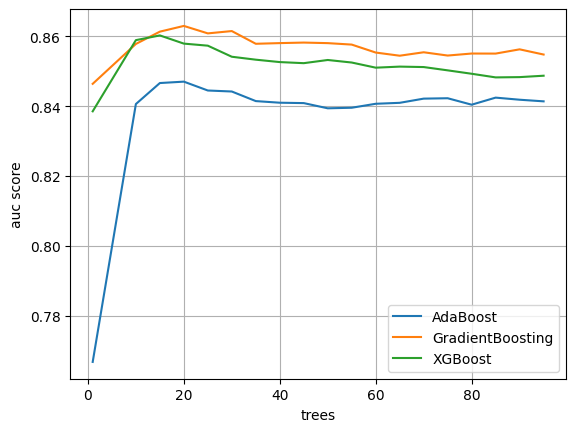

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(trees, ada_scoring.mean(axis=1), label="AdaBoost")
plt.plot(trees, gbc_scoring.mean(axis=1), label="GradientBoosting")
plt.plot(trees, xgb_scoring.mean(axis=1), label="XGBoost")
plt.grid(True)
plt.xlabel("trees")
plt.ylabel("auc score")
plt.legend(loc="lower right")